## Notebook showing an implementation of our multilayer community detection method on dummy data

In [5]:
#importing libraries

%matplotlib inline
import numpy as np
import numpy.matlib
import configcorr as cg #for correlation matrix null model
from scipy.sparse import spdiags
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from netneurotools import cluster #for consensus clustering
import matlab.engine #for GenLouvain

import corr_comm_detection as ccd #access my community detection functions

In [95]:
#generate random covariance matrices (we will generate three matrices/layers with 10 nodes each for this example)
np.random.seed(10)
rand_covs = []
for i in range(3):
    rand_mat = np.random.rand(10,10) #random 10x10 matrix
    rand_cov = np.dot(rand_mat, rand_mat.transpose()) #random 10x10 covariance matrix
    rand_covs.append(rand_cov)

### Visualize the random covariance matrices we will be performing the multilayer community detection on

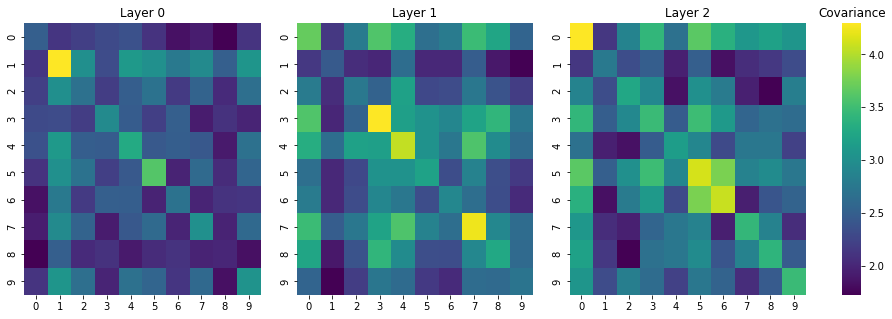

In [96]:
fig,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, 
            gridspec_kw={'width_ratios':[1,1,1,0.08]}, figsize=(15,5))
g1 = sns.heatmap(rand_covs[0],cmap='viridis',cbar=False,ax=ax1)
g2 = sns.heatmap(rand_covs[1],cmap='viridis',cbar=False,ax=ax2)
g3 = sns.heatmap(rand_covs[2],cmap='viridis',cbar_ax=axcb,ax=ax3)
ax1.title.set_text('Layer 0')
ax2.title.set_text('Layer 1')
ax3.title.set_text('Layer 2')
axcb.title.set_text('Covariance')
plt.show()

In [97]:
#run the community detection code (in corr_comm_detection.py) to obtain the parition and significance results
part_array, zscores = ccd.main(rand_covs,L=100,
    genlouvain_file_location='/Users/madisonrussell/Desktop/gene_networks_code/GenLouvain-master',
    tolerance=1e-5,runs=200,gamma=1.0,omega=0.1)

                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Mar 05 12:00:26 PM: Your problem has 100 variables, 2 constraints, and 0 parameters.
(CVXPY) Mar 05 12:00:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 05 12:00:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 05 12:00:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 05 12:00:26 PM: Compiling problem (target solver=SCS).
(CVXPY) Mar 05 12:00:26 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing ->

(CVXPY) Mar 05 12:00:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 05 12:00:28 PM: Compiling problem (target solver=SCS).
(CVXPY) Mar 05 12:00:28 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Mar 05 12:00:28 PM: Applying reduction Dcp2Cone
(CVXPY) Mar 05 12:00:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) Mar 05 12:00:28 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Mar 05 12:00:28 PM: Applying reduction SCS
(CVXPY) Mar 05 12:00:28 PM: Finished problem compilation (took 6.446e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                 

In [98]:
#print the Z score for each community detected
print(zscores)

[25.352468549423385, 27.67906794917708]


A large positive Z score indicates that the community detected is statistically significant because it has a higher total intralayer weight within the community than expected.

### Visualize the partition of the covariance matrices

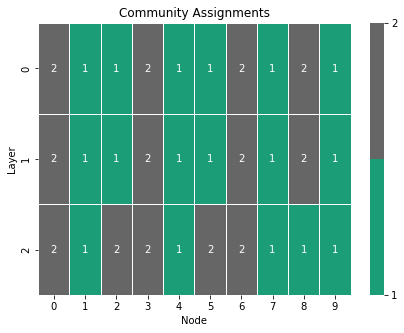

In [101]:
plt.figure(figsize=(7,5))
# get discrete colormap
dcmap = plt.get_cmap('Dark2', np.max(part_array) - np.min(part_array) + 1)
ax = sns.heatmap(part_array.transpose(),cmap=dcmap,cbar_kws=dict(ticks=list(range(1,np.max(part_array)+1))),
                 annot=True, linewidth=.5)
plt.title('Community Assignments')
plt.xlabel('Node')
plt.ylabel('Layer')
plt.show()